# Bert Model


-----
```
: Zach Wolpe
: zachcolinwolpe@gmail.com
```
-----

In [84]:
# importing neccessary libraries 
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, BertPreTrainedModel, BertModel,AdamW
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
import sklearn


from nltk.corpus import stopwords
import argparse
import logging
import string
import re
import os

from sklearn.model_selection import train_test_split, KFold
import torch.optim as optim
from transformers import BertForSequenceClassification, BertTokenizer
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from transformers import BertModel
import os


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zachwolpe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
# Config ---------------------------------------->>
PATH_TO_DATA = './data/train_test/'
BATCH_SIZE = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Config ---------------------------------------->>

In [147]:
X_train = pd.read_csv(PATH_TO_DATA + 'X_train.csv')
y_train = pd.read_csv(PATH_TO_DATA + 'y_train.csv')
X_test = pd.read_csv(PATH_TO_DATA + 'X_test.csv')
y_test = pd.read_csv(PATH_TO_DATA + 'y_test.csv')


# K-Fold Validation

In [103]:
# def generate_K_Fold_data(X_train, y_train, num_splits=10):
#     kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
#     for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
#         logging.info(f"Fold {fold+1}/{num_splits}")
#         X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
#         y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
#         yield X_train_fold, y_train_fold, X_val_fold, y_val_fold, train_index, val_index


In [104]:
gkfd = generate_K_Fold_data(X_train, y_train, num_splits=10)
X_train_fold, y_train_fold, X_val_fold, y_val_fold, train_index, val_index = next(gkfd)

# Tokenize & Tensorize

In [114]:
# def Bert_tokenize(X, y):
#     """
#         : Tokenize the input data using the BERT tokenizer.
#         : Transform to torch.tensors
#         : Return the tokenized inputs, attention masks, and y values
#     """
#     # Tokenize the "Review Text" column
#     tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#     tokenized_inputs = tokenizer(X['Review Text'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
#     input_ids = tokenized_inputs.input_ids
#     attention_masks = tokenized_inputs.attention_mask
#     y = torch.tensor(y['Sentiment'].tolist())
#     return input_ids, attention_masks, y

In [115]:
input_ids_train, attention_masks_train, y_train = Bert_tokenize(X_train_fold, y_train_fold)
input_ids_val, attention_masks_val, y_val = Bert_tokenize(X_val_fold, y_val_fold)


# Torch Tensors

In [117]:
# # Create PyTorch datasets and data loaders for this fold
# if torch.cuda.is_available():
#     train_dataset = TensorDataset(input_ids_train.cuda(), attention_masks_train.cuda(), torch.tensor(y_train_fold.values).cuda())
#     val_dataset = TensorDataset(input_ids_val.cuda(), attention_masks_val.cuda(), torch.tensor(y_val_fold.values).cuda())
#     train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
#     val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
# else:
#     train_dataset = TensorDataset(input_ids_train, attention_masks_train, torch.tensor(y_train_fold.values))
#     val_dataset = TensorDataset(input_ids_val, attention_masks_val, torch.tensor(y_val_fold.values))
#     train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
#     val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

----
# Bert Model
----

In [123]:
# # Define the model with activation function and regularization
# class BertWithActivationAndRegularization(nn.Module):
#     def __init__(self, pretrained_model_name, num_labels, dropout_prob=0.5, weight_decay=0.01):
#         super(BertWithActivationAndRegularization, self).__init__()
#         self.bert = BertModel.from_pretrained(pretrained_model_name)
#         self.dropout = nn.Dropout(dropout_prob)
#         self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
#         self.activation = nn.GELU()
#         self.weight_decay = weight_decay
        
#     def forward(self, input_ids, attention_mask):
#         outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         pooled_output = outputs.pooler_output
#         pooled_output = self.dropout(pooled_output)
#         logits = self.classifier(pooled_output)
#         logits = self.activation(logits)  # Applying GELU activation function
#         return logits

In [124]:
# Specify the pretrained BERT model name
model_name = 'bert-base-uncased'

# Create an instance of the model
model = BertWithActivationAndRegularization(pretrained_model_name='bert-base-uncased', num_labels=3)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertWithActivationAndRegularization(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), 

In [125]:
# Define lists to store metrics for each fold
train_losses_per_fold = []
valid_losses_per_fold = []
accuracies_per_fold = []

In [126]:
import torch.optim as optim

# Define the optimizer and criterion
learning_rate = 2e-06
weight_decay = 0.0001  
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

In [139]:
# Lists to store losses for this fold
train_losses_fold = []
valid_losses_fold = []
accuracies_fold = []

# Training loop
epochs = 6
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        labels = labels.reshape(-1)  # Reshape labels once

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        loss = criterion(logits, labels)
        total_train_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        loss.backward()
        optimizer.step()

    average_train_loss = total_train_loss / len(train_dataloader)
    train_losses_fold.append(average_train_loss)

    # Validation loop
    model.eval()
    total_valid_loss = 0
    correct_valid = 0
    total_valid = 0

    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            labels = labels.reshape(-1)  # Reshape labels once

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs
            loss = criterion(logits, labels)
            total_valid_loss += loss.item()
            
            _, predicted = torch.max(logits, 1)
            correct_valid += (predicted == labels).sum().item() 
            total_valid += labels.size(0)

    average_valid_loss = total_valid_loss / len(val_dataloader)
    valid_losses_fold.append(average_valid_loss)

    accuracy_train = correct_train / total_train
    accuracy_valid = correct_valid / total_valid
    accuracies_fold.append((accuracy_train, accuracy_valid))

    print(f'Epoch {epoch+1}/{epochs} - Training Loss: {average_train_loss:.4f} - Validation Loss: {average_valid_loss:.4f} - Training Accuracy: {accuracy_train:.4f} - Validation Accuracy: {accuracy_valid:.4f}')

# Save metrics for this fold
train_losses_per_fold.append(train_losses_fold)
valid_losses_per_fold.append(valid_losses_fold)
accuracies_per_fold.append(accuracies_fold)

Epoch 1/6 - Training Loss: 0.9435 - Validation Loss: 1.1909 - Training Accuracy: 0.6111 - Validation Accuracy: 0.3500
Epoch 2/6 - Training Loss: 0.9100 - Validation Loss: 1.2253 - Training Accuracy: 0.6139 - Validation Accuracy: 0.2250
Epoch 3/6 - Training Loss: 0.8879 - Validation Loss: 1.2085 - Training Accuracy: 0.6361 - Validation Accuracy: 0.2750
Epoch 4/6 - Training Loss: 0.8417 - Validation Loss: 1.2206 - Training Accuracy: 0.6917 - Validation Accuracy: 0.3000
Epoch 5/6 - Training Loss: 0.8025 - Validation Loss: 1.2426 - Training Accuracy: 0.7056 - Validation Accuracy: 0.3000
Epoch 6/6 - Training Loss: 0.7819 - Validation Loss: 1.2226 - Training Accuracy: 0.7333 - Validation Accuracy: 0.4000


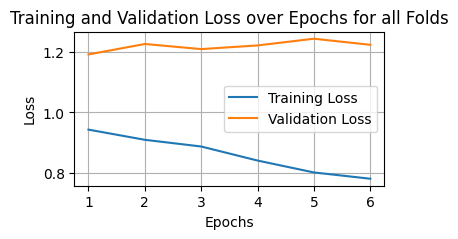

In [140]:
# Plotting training and validation losses for all folds
num_epochs = len(train_losses_fold)
plt.figure(figsize=(4, 2))
plt.plot(range(1, num_epochs + 1), train_losses_fold, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses_fold, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs for all Folds')
plt.legend()
plt.grid(True)
plt.show()

----
### Save + Load Model
----

In [150]:
# Save Bert Model
SAVE_LOC = './model-artifacts/'
torch.save(model.state_dict(), f'{SAVE_LOC}bert_model.pth')


In [151]:
# laod data
X_test = pd.read_csv(PATH_TO_DATA + 'X_test.csv')
y_test = pd.read_csv(PATH_TO_DATA + 'y_test.csv')


# load the model
model = BertWithActivationAndRegularization(pretrained_model_name='bert-base-uncased', num_labels=3)
model.load_state_dict(torch.load(f'{SAVE_LOC}bert_model.pth'))

<All keys matched successfully>

In [152]:
# evaluate on test data
model.eval()
input_ids_test, attention_masks_test, y_test = Bert_tokenize(X_test, y_test)
test_dataset = TensorDataset(input_ids_test, attention_masks_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

total_test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        labels = labels.reshape(-1)  # Reshape labels once

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        loss = criterion(logits, labels)
        total_test_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        correct_test += (predicted == labels).sum().item() 
        total_test += labels.size(0)
        accuracy_test = correct_test / total_test
        print(f'Test Loss: {total_test_loss:.4f} - Test Accuracy: {accuracy_test:.4f}')


Test Loss: 1.0323 - Test Accuracy: 0.4000
Test Loss: 1.9925 - Test Accuracy: 0.4500
Test Loss: 3.0078 - Test Accuracy: 0.4667
Test Loss: 3.8005 - Test Accuracy: 0.5500
Test Loss: 4.8367 - Test Accuracy: 0.5200
Test Loss: 5.8150 - Test Accuracy: 0.5167
Test Loss: 7.1054 - Test Accuracy: 0.4714
Test Loss: 7.9993 - Test Accuracy: 0.4875
Test Loss: 8.9436 - Test Accuracy: 0.5000
Test Loss: 10.0724 - Test Accuracy: 0.4800
Test Loss: 10.9550 - Test Accuracy: 0.4851


----
# RoBERTaModel
----

In [159]:
X_train = pd.read_csv(PATH_TO_DATA + 'X_train.csv')
y_train = pd.read_csv(PATH_TO_DATA + 'y_train.csv')
X_test = pd.read_csv(PATH_TO_DATA + 'X_test.csv')
y_test = pd.read_csv(PATH_TO_DATA + 'y_test.csv')

In [160]:
# from transformers import RobertaTokenizer, RobertaForSequenceClassification
# import torch.nn.functional as F
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
# import torch.nn as nn
# from sklearn.model_selection import train_test_split, KFold
# import torch.optim as optim
# from transformers import RobertaModel

In [161]:
# # Define the model with activation function and regularization
# class RobertaWithActivationAndRegularization(nn.Module):
#     def __init__(self, pretrained_model_name, num_labels, dropout_prob=0.5, weight_decay=0.01):
#         super(RobertaWithActivationAndRegularization, self).__init__()
#         self.roberta = RobertaModel.from_pretrained(pretrained_model_name)
#         self.dropout = nn.Dropout(dropout_prob)
#         self.classifier = nn.Linear(self.roberta.config.hidden_size, num_labels)
#         self.activation = nn.GELU()
#         self.weight_decay = weight_decay
        
#     def forward(self, input_ids, attention_mask):
#         outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
#         pooled_output = outputs.pooler_output
#         pooled_output = self.dropout(pooled_output)
#         logits = self.classifier(pooled_output)
#         logits = self.activation(logits)  # Applying GELU activation function
#         return logits

In [165]:
# def RoBertaTokenizer(X, y): 
#     """
#         : Tokenize the input data using the RoBERTa tokenizer.
#         : Transform to torch.tensors
#         : Return the tokenized inputs, attention masks, and y values
#     """
#     # Tokenize the "Review Text" column
#     tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
#     tokenized_inputs = tokenizer(X['Review Text'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
#     input_ids = tokenized_inputs.input_ids
#     attention_masks = tokenized_inputs.attention_mask
#     y = torch.tensor(y['Sentiment'].tolist())
#     return input_ids, attention_masks, y

    

In [166]:
gkfd = generate_K_Fold_data(X_train, y_train, num_splits=10)
X_train_fold, y_train_fold, X_val_fold, y_val_fold, train_index, val_index = next(gkfd)

In [167]:
input_ids_train, attention_masks_train, y_train = RoBertaTokenizer(X_train_fold, y_train_fold)
input_ids_val, attention_masks_val, y_val = RoBertaTokenizer(X_val_fold, y_val_fold)


In [168]:
batch_size = 16


In [170]:
# # Create PyTorch datasets and data loaders for this fold
# if torch.cuda.is_available():
#     train_dataset = TensorDataset(input_ids_train.cuda(), attention_masks_train.cuda(), torch.tensor(y_train_fold.values).cuda())
#     val_dataset = TensorDataset(input_ids_val.cuda(), attention_masks_val.cuda(), torch.tensor(y_val_fold.values).cuda())
#     train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
#     val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
# else:
#     train_dataset = TensorDataset(input_ids_train, attention_masks_train, torch.tensor(y_train_fold.values))
#     val_dataset = TensorDataset(input_ids_val, attention_masks_val, torch.tensor(y_val_fold.values))
#     train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
#     val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

In [171]:
# Specify the pretrained BERT model name
model_name = 'roberta-base'

# Create an instance of the model
model = RobertaWithActivationAndRegularization(pretrained_model_name='roberta-base', num_labels=3)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaWithActivationAndRegularization(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
       

In [172]:
import torch.optim as optim

# Define the optimizer and criterion
learning_rate = 2e-06
weight_decay = 0.0001  
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

In [173]:
# Lists to store losses for this fold
train_losses_fold = []
valid_losses_fold = []
accuracies_fold = []

In [176]:
# Training loop
epochs = 6
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        labels = labels.reshape(-1)  # Reshape labels once

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        loss = criterion(logits, labels)
        total_train_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        loss.backward()
        optimizer.step()

    average_train_loss = total_train_loss / len(train_dataloader)
    train_losses_fold.append(average_train_loss)

    # Validation loop
    model.eval()
    total_valid_loss = 0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            labels = labels.reshape(-1)  # Reshape labels once

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs

            loss = criterion(logits, labels)
            total_valid_loss += loss.item()
            
            _, predicted = torch.max(logits, 1)
            correct_valid += (predicted == labels).sum().item() 
            total_valid += labels.size(0)

    average_valid_loss = total_valid_loss / len(val_dataloader)
    valid_losses_fold.append(average_valid_loss)

    # Calculate accuracy for this fold
    accuracy_train = correct_train / total_train
    accuracy_valid = correct_valid / total_valid
    accuracies_fold.append((accuracy_train, accuracy_valid))

    print(f'Epoch {epoch+1}/{epochs} - Training Loss: {average_train_loss:.4f} - Validation Loss: {average_valid_loss:.4f} - Training Accuracy: {accuracy_train:.4f} - Validation Accuracy: {accuracy_valid:.4f}')

# Save metrics for this fold
train_losses_per_fold.append(train_losses_fold)
valid_losses_per_fold.append(valid_losses_fold)
accuracies_per_fold.append(accuracies_fold)

Epoch 1/6 - Training Loss: 1.1021 - Validation Loss: 1.0970 - Training Accuracy: 0.3222 - Validation Accuracy: 0.3500
Epoch 2/6 - Training Loss: 1.0950 - Validation Loss: 1.0966 - Training Accuracy: 0.3417 - Validation Accuracy: 0.3500
Epoch 3/6 - Training Loss: 1.1098 - Validation Loss: 1.0960 - Training Accuracy: 0.3278 - Validation Accuracy: 0.3000
Epoch 4/6 - Training Loss: 1.0989 - Validation Loss: 1.0954 - Training Accuracy: 0.3417 - Validation Accuracy: 0.3250
Epoch 5/6 - Training Loss: 1.0992 - Validation Loss: 1.0899 - Training Accuracy: 0.3056 - Validation Accuracy: 0.4250
Epoch 6/6 - Training Loss: 1.0748 - Validation Loss: 1.0630 - Training Accuracy: 0.4361 - Validation Accuracy: 0.5000


In [177]:
 # Debugging print statements to check the lengths
print("Length of train_losses_fold:", len(train_losses_fold))
print("Length of valid_losses_fold:", len(valid_losses_fold)) 

Length of train_losses_fold: 7
Length of valid_losses_fold: 6


(6, 7)

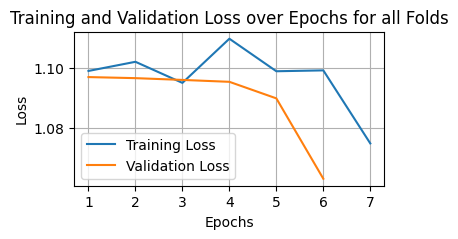

In [182]:
# Plotting training and validation losses for all folds
num_epochs = len(train_losses_fold)
plt.figure(figsize=(4, 2))
plt.plot(range(1, num_epochs + 1), train_losses_fold, label='Training Loss')
plt.plot(range(1, num_epochs ), valid_losses_fold, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs for all Folds')
plt.legend()
plt.grid(True)
plt.show()

In [183]:
# Save RoBerta Model
SAVE_LOC = './model-artifacts/'
torch.save(model.state_dict(), f'{SAVE_LOC}roberta_model.pth')

In [186]:
# Load model
model = RobertaWithActivationAndRegularization(pretrained_model_name='roberta-base', num_labels=3,)
model.load_state_dict(torch.load(f'{SAVE_LOC}roberta_model.pth'))
    

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [190]:
RobertaWithActivationAndRegularization()

TypeError: Module.__dir__() missing 1 required positional argument: 'self'

In [192]:
# RobertaWithActivationAndRegularization.from_pretrained('roberta-base', num_labels=3)
RobertaModel.from_pretrained('roberta-base')

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou

In [ ]:

# Evaluate on test data
model.eval()
input_ids_test, attention_masks_test, y_test = RoBertaTokenizer(X_test, y_test)
test_dataset = TensorDataset(input_ids_test, attention_masks_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

total_test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        labels = labels.reshape(-1)  # Reshape labels once

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        loss = criterion(logits, labels)
        total_test_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        correct_test += (predicted == labels).sum().item() 
        total_test += labels.size(0)
        accuracy_test = correct_test / total_test
        print(f'Test Loss: {total_test_loss:.4f} - Test Accuracy: {accuracy_test:.4f}')
        